# Menganalisis Data Penjualan Game di Toko Online 'Ice' Berdasarkan Ulasan Pengguna, Ahli Game, Genre, dan Platform
Kamu bekerja di toko online "Ice" yang menjual video game dari seluruh dunia. Data terkait ulasan pengguna dan ahli game, genre, platform (misalnya, Xbox atau PlayStation), dan data historis penjualan game tersedia dari open source. Kamu perlu mengidentifikasi pola-pola yang menentukan apakah suatu game bisa dikatakan berhasil atau tidak. Dengan begitu, kamu bisa menemukan game yang paling potensial dan merencanakan kampanye iklannya.


Di depanmu ada data dari tahun 2016. Coba deh bayangkan bahwa sekarang adalah bulan Desember tahun 2016 dan kamu sedang merencanakan kampanye untuk tahun 2017. 


(Yang terpenting adalah untuk mendapatkan pengalaman dalam bekerja dengan data. Tidak masalah apakah kamu meramalkan penjualan tahun 2017 berdasarkan data dari tahun 2016 atau meramalkan penjualan tahun 2027 berdasarkan data dari tahun 2026.).


Dataset ini memuat singkatan ESRB. ESRB merupakan singkatan dari Entertainment Software Rating Board, yaitu sebuah organisasi regulator mandiri yang mengevaluasi konten game dan memberikan rating usia seperti Remaja atau Dewasa.

# Tujuan

Proyek ini memiliki tujuan untuk memahami dan menganalisis faktor-faktor yang memengaruhi kesuksesan game di toko online "Ice". Dengan data dari tahun 2016, Analisa berusaha mengidentifikasi pola-pola yang dapat membantu merencanakan kampanye iklan pada tahun 2017. Adanya informasi ESRB juga memungkinkan analisis terhadap pengaruh rating usia terhadap performa penjualan. Proyek ini tidak hanya memberikan wawasan tentang tren penjualan game, tetapi juga memungkinkan penggunaan keterampilan meramalkan untuk merencanakan strategi pemasaran di masa mendatang.

# Tahapan

Tahapan dari proyek ini memiliki lima tahapan diantaranya:
1. Pra-pemrosesan data
2. Data Preparation
3. Data Analyst
4. Melakukan pemrofilan pengguna untuk masing-masing wilayah
5. Melakukan Uji Hipotesis
6. Kesimpulan Umum

# Pra-pemrosesan data

Tahapan Pra-pemrosesan data dilakukan untuk mengetahui informasi terkait dataset yang akan dilakukan analisa, apakah ada data yang tidak sesuai, data mana yang akan digunakan, serta penanganan apa yang harus dilakukan untuk membuat data menjadi lebih baik.

## Inisialisasi

In [1]:
# Memuat library

import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from scipy import stats as st
import seaborn as sns

## Memuat Data

In [2]:
# Muat file data ke dalam DataFrame

df = pd.read_csv('/datasets/games.csv')

## Gambaran Umum Data

In [3]:
# Melihat gambaran umum data

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Kolom Deskripsi**

- `Name` 
- `Platform` 
- `Year_of_Release` : tahun rilis 
- `Genre` 
- `NA_sales` : penjualan di Amerika Utara dalam satuan juta USD
- `EU_sales` : penjualan di Eropa dalam satuan juta USD
- `JP_sales` : penjualan di Jepang dalam satuan juta USD
- `Other_sales` : penjualan di negara lainnya dalam satuan juta USD
- `Critic_Score` : skor ulasan dari kritikus, maksimal 100
- `User_Score` : skor ulasan dari pengguna, maksimal 10
- `Rating` : ESRB

In [4]:
# Memeriksa nilai yang hilang

df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
# Melihat sampel data

df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
12439,Zumba Fitness Core,Wii,2012.0,Misc,0.00,0.06,0.00,0.01,NaN,tbd,E10+
8451,ZhuZhu Puppies,DS,2011.0,Simulation,0.12,0.03,0.00,0.01,NaN,tbd,E
5881,Jonas,DS,2009.0,Adventure,0.27,0.00,0.00,0.02,45.0,tbd,E
6472,Final Fantasy V Advance,GBA,2006.0,Role-Playing,0.00,0.00,0.26,0.01,83.0,7.2,E
5802,Shrek's Carnival Craze Party Games,Wii,2008.0,Misc,0.28,0.00,0.00,0.02,NaN,NaN,NaN
5564,Hatsune Miku: Project Mirai DX,3DS,2015.0,Misc,0.16,0.04,0.10,0.02,80.0,8.5,E10+
7526,Thrillville,PSP,2006.0,Strategy,0.18,0.00,0.00,0.02,72.0,2.8,E10+
537,Skylanders: Spyro's Adventure,Wii,2011.0,Action,1.35,1.13,0.00,0.30,81.0,5.6,E10+
6288,Hot Wheels: Track Attack,DS,2010.0,Racing,0.17,0.08,0.00,0.02,NaN,tbd,E
7059,Hot Wheels: Beat That!,DS,2007.0,Racing,0.21,0.00,0.00,0.02,NaN,tbd,E


## Kesimpulan Umum Pra-pemrosesan data

berdasarkan dari hasil gambaran umum, dataset memiliki masalah diantaranya:

**Permasalahan dataset:**
- Nama kolom tidak menggunakan huruf kecil
- Tipe data `year_of_release` adalah float64, bukan Int64
- Ada nilai yang hilang di `year_of_release` yang akan menimbulkan masalah dalam analisis lebih lanjut
- Ada nilai tbd dalam `user_score`
- tipe data `user_score` adalah object, bukan float64
- Tidak ada kolom yang menunjukkan nilai total penjualan dari semua wilayah
- Ada nilai yang hilang pada kolom `Critic_Score`, `User_Score`, dan `Rating`


**Penanganan dataset:**

- Nama kolom akan dirubah menggunakan huruf kecil 
- Tipe data `year_of_release` akan dibuat menjadi Int64
- nilai yang hilang di `year_of_release` yang akan dihapus dan data sebelum tahun 2000 perlu dihapus karena dianggap tidak relevan lagi.
- nilai tbd dalam `user_score` akan dirubah menjadi NaN
- merubah tipe data `user_score` menjadi float64 dan menjadikan skala 0-100 agar sama dengan `critic_score`
- membuat kolom yang menunjukkan nilai total penjualan dari semua wilayah
- nilai yang hilang pada kolom `Critic_Score`, `User_Score`, dan `Rating` akan dibiarkan kosong. Dikhawatirkan mengganti nilai yang hilang dengan median atau rata-rata akan mengakibatkan kesalahan analisis

# Data Preparation

Setalah melalukan Pra-pemrosesan data dan mendapatkan insight tentang data yang harus dilakukan, pada proses data preparation ini data akan disiapkan untuk dilakukan analisa lebih lanjut

In [6]:
# merubah nama kolom menjadi huruf kecil

df.columns = df.columns.str.lower()

In [7]:
# merubah tipe data year_of_release menjadi int

df['year_of_release'] = df['year_of_release'].astype('Int64')

In [8]:
# menghapus missing value year_of_release dan menghapus data year_of_release < 2000

df = df.loc[(df['year_of_release'] != None) & (df['year_of_release'] >= 2000)].reset_index(drop=True)

In [9]:
# mengganti nilai tbd menjadi NaN pada kolom user_score 

df.loc[df['user_score'] == 'tbd', 'user_score'] = None

In [10]:
# merubah tipe data user_score menjadi float

df['user_score'] = df['user_score'].astype('float64')

In [11]:
# membuat kolom baru total_sales

df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [12]:
# Melihat gambaran umum data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14470 entries, 0 to 14469
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14470 non-null  object 
 1   platform         14470 non-null  object 
 2   year_of_release  14470 non-null  Int64  
 3   genre            14470 non-null  object 
 4   na_sales         14470 non-null  float64
 5   eu_sales         14470 non-null  float64
 6   jp_sales         14470 non-null  float64
 7   other_sales      14470 non-null  float64
 8   critic_score     7887 non-null   float64
 9   user_score       7371 non-null   float64
 10  rating           9663 non-null   object 
 11  total_sales      14470 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.3+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


## Kesimpulan data preparation

hasil dari data preparation yang nantinya akan dilakukan anailsa data, oleh karena itu data data yang dibetulkan adalah memuat periode waktu pengambilan data diatas tahun 2000 yang akan dilakukan anlisa kedepannya, menambakan kolom total_sales untuk keperluan analisa, merubah tipe data dari tipe data yang kurang tepat

# Data Analyst

tahapan ini akan melakukan analisa data terhadap pola-pola pada penjualan, periode waktu pengambilan data untuk analisa, mengetahui kolerasi antara ulasan dan penjualan, membandingkan game yang sama pada setiap platform melihat distribusi game berdasarkan genre

## Game yang Diluncurkan pada Tahun yang Berbeda

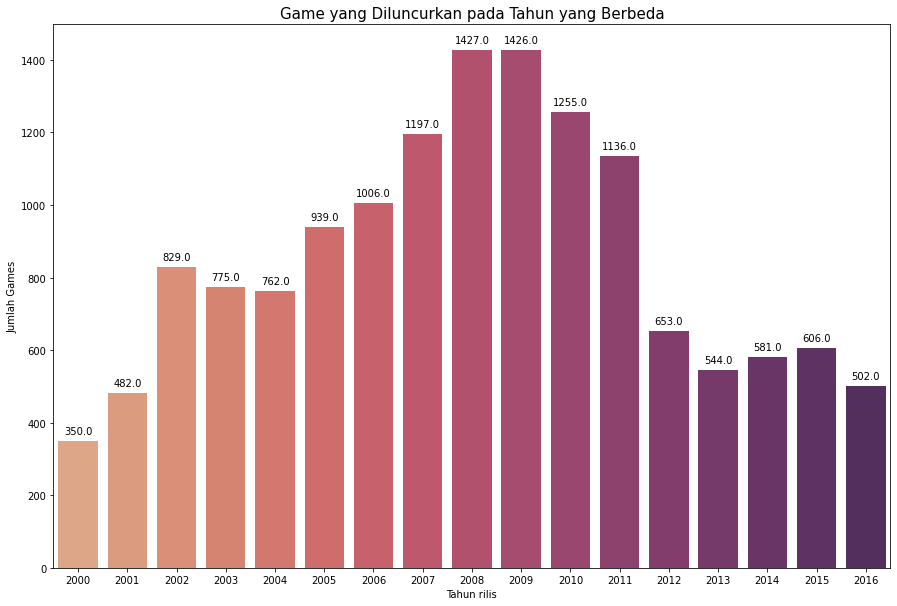

In [13]:
# visualisasi berapa banyak game yang diluncurkan pada tahun yang berbeda

# membuat digram batang
plt.figure(figsize=(15,10))
a = sns.countplot(x=df['year_of_release'], palette='flare')

# menampilkan label pada diagram batang
for g in a.patches:
    a.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), rotation=0, 
                   textcoords = 'offset points')

# memberikan penamaan label pada diagram
plt.title('Game yang Diluncurkan pada Tahun yang Berbeda',fontsize=15)
plt.xlabel('Tahun rilis')
plt.ylabel('Jumlah Games')
plt.show()

**Kesimpulan sementara**

dapat dilihat berdasarkan visualisasi bahwa jumlah perilisan game tertinggi terjadi pada tahun 2008-2009, merupakan puncak tahun perilisan sebuah game. namum, setelah itu mulai terjadi penurunan terhadap perilisan games

## Bagaimana Penjualan Bervariasi dari Satu Platform ke Platform Lainnya

pada tahap ini akan dilakukan analisa penjualan bervariasi dari satu platform ke platform lainnya. memilih platform dengan total penjualan terbesar dan buat distribusinya berdasarkan data per tahun. Cari platform yang dahulu populer, tetapi sekarang tidak memiliki penjualan apa pun

**Variasi penjualan dari satu platform ke platform lainnya**

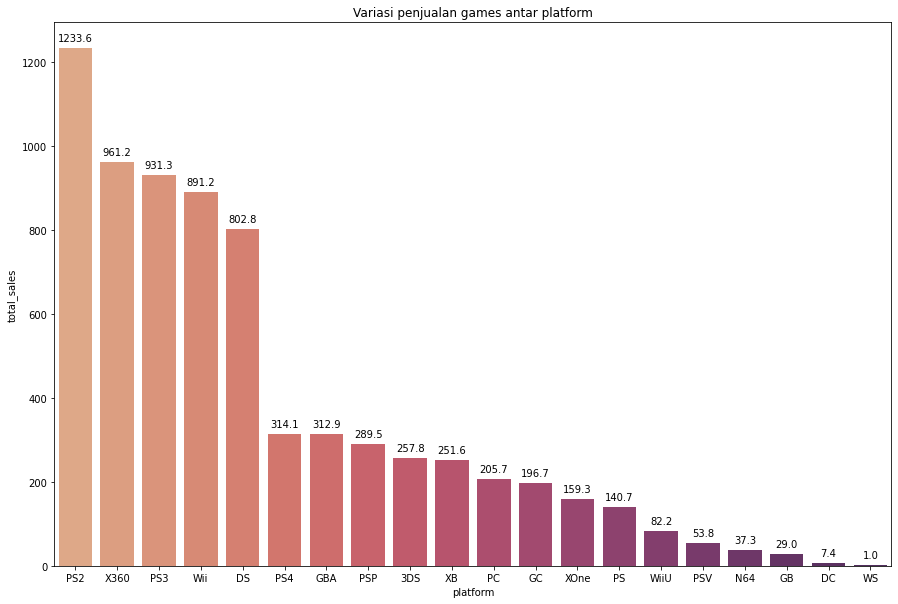

In [14]:
# melakukan pengelompokan penjumlahan platfrom dan total_sales
total_sales_platform = df.groupby('platform')['total_sales'].agg('sum').reset_index().sort_values('total_sales', ascending=False)

# membuat diagram batang
plt.figure(figsize=(15, 10))
a = sns.barplot(data=total_sales_platform, x='platform', y='total_sales', palette='flare')

# menampilkan label pada diagram batang
for g in a.patches:
    a.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), rotation=0, 
                   textcoords = 'offset points')

plt.title('Variasi penjualan games antar platform');

**Kesimpulan Sementara**

platform PS2 memiliki angka penjualan sebanyak 1.233 juta USD dari tahun 2000-2016 merupakan angka penjualan tertinggi jika dibandingkan dengan platform game yang lainnya

**Platform dengan total penjualan terbesar dan membuat distribusi penjualan**

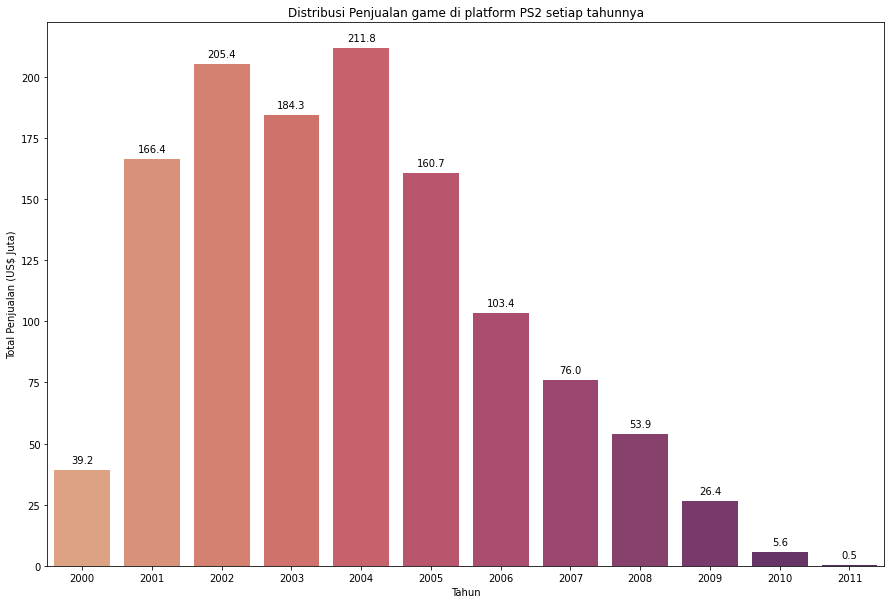

In [15]:
# mengambil data PS2 karena memiliki penjualan tertinggi
ps2 = df[df['platform'] == 'PS2']

# membuat diagram batang
plt.figure(figsize=(15,10))
data_ps2 = sns.barplot(data=ps2,x='year_of_release',y='total_sales', estimator=sum, ci=None, palette='flare')

# membuat label diagram batang
for g in data_ps2.patches:
    data_ps2.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), rotation=0, 
                   textcoords = 'offset points')
    
plt.title('Distribusi Penjualan game di platform PS2 setiap tahunnya');
plt.xlabel('Tahun')
plt.ylabel('Total Penjualan (US$ Juta)')
plt.show()

**Kesimpulan Sementara**

distribusi penjualan games PS2 memiliki angka tertinggi pada tahun 2004, kemudian penjualan perlahan mulai menurun, banyak faktor yang mengakibatkan penurunan penjualan ini, kemungkinan karena adanya platform PS3 yang lebih canggih

**Platform yang dulunya populer tetapi sekarang tidak memiliki penjualan apa pun**

In [16]:
# menjumlahkan jumlah popularitas untuk semua platform
df_lifetime = pd.pivot_table(df, values='total_sales', index='year_of_release', columns='platform', aggfunc='sum', fill_value=0)
df_lifetime

platform,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,
2000,0.00,5.99,0.00,19.76,0.07,0.00,33.97,4.66,96.37,39.17,0.00,0.00,0.00,0.00,0.68,0.00,0.00,0.00,0.99,0.00
2001,0.00,1.07,0.00,9.24,61.53,26.34,3.25,5.47,35.59,166.43,0.00,0.00,0.00,0.00,0.28,0.00,0.00,0.00,22.26,0.00
2002,0.00,0.29,0.00,0.00,74.16,51.81,0.08,8.57,6.67,205.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,48.01,0.00
2003,0.00,0.00,0.00,0.00,56.67,50.61,0.00,8.84,2.07,184.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,55.04,0.00
2004,0.00,0.00,17.27,0.00,77.91,28.82,0.00,10.39,0.00,211.81,0.00,0.00,7.06,0.00,0.00,0.00,0.00,0.00,65.42,0.00
2005,0.00,0.00,130.14,0.00,33.86,27.62,0.00,4.37,0.00,160.66,0.00,0.00,43.84,0.00,0.00,0.00,0.00,8.25,49.08,0.00
2006,0.00,0.00,119.81,0.00,5.28,11.26,0.00,2.85,0.00,103.42,20.96,0.00,55.32,0.00,0.00,137.15,0.00,51.62,10.04,0.00
2007,0.00,0.02,146.94,0.00,3.40,0.27,0.00,9.28,0.00,75.99,73.19,0.00,46.93,0.00,0.00,152.77,0.00,95.41,0.55,0.00
2008,0.00,0.04,145.31,0.00,0.00,0.00,0.00,12.42,0.00,53.90,118.52,0.00,34.55,0.00,0.00,171.32,0.00,135.26,0.18,0.00


In [17]:
# Menampilkan platform-platform yang memiliki total penjualan 0 pada tahun 2016
platforms_with_zero_sales_2016 = df_lifetime.loc[2016][df_lifetime.loc[2016] == 0].index.tolist()

print("Platform-platform yang memiliki total penjualan 0 pada tahun 2016:")
print(platforms_with_zero_sales_2016)

Platform-platform yang memiliki total penjualan 0 pada tahun 2016:
['DC', 'DS', 'GB', 'GBA', 'GC', 'N64', 'PS', 'PS2', 'PSP', 'WS', 'XB']


In [18]:
# Filter dataframe untuk hanya platform-platform yang memiliki total penjualan 0 pada tahun 2016

unpopular_platform = df.loc[(df['platform']).isin(platforms_with_zero_sales_2016)]
unpopular_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
6,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
7,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
12,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
13,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,4.74,9.20,4.16,2.04,77.0,7.9,E,20.14


In [19]:
# membuat tabel pivot untuk platform yang sudah tidak populer

pivot_unpopular_platform = unpopular_platform.pivot_table(columns='platform', index='year_of_release',
                                                            values='total_sales',
                                                            aggfunc='sum').fillna(0).reset_index()
pivot_unpopular_platform

platform,year_of_release,DC,DS,GB,GBA,GC,N64,PS,PS2,PSP,WS,XB
0,2000,5.99,0.00,19.76,0.07,0.00,33.97,96.37,39.17,0.00,0.68,0.99
1,2001,1.07,0.00,9.24,61.53,26.34,3.25,35.59,166.43,0.00,0.28,22.26
2,2002,0.29,0.00,0.00,74.16,51.81,0.08,6.67,205.38,0.00,0.00,48.01
3,2003,0.00,0.00,0.00,56.67,50.61,0.00,2.07,184.31,0.00,0.00,55.04
4,2004,0.00,17.27,0.00,77.91,28.82,0.00,0.00,211.81,7.06,0.00,65.42
5,2005,0.00,130.14,0.00,33.86,27.62,0.00,0.00,160.66,43.84,0.00,49.08
6,2006,0.00,119.81,0.00,5.28,11.26,0.00,0.00,103.42,55.32,0.00,10.04
7,2007,0.02,146.94,0.00,3.40,0.27,0.00,0.00,75.99,46.93,0.00,0.55
8,2008,0.04,145.31,0.00,0.00,0.00,0.00,0.00,53.90,34.55,0.00,0.18
9,2009,0.00,119.54,0.00,0.00,0.00,0.00,0.00,26.40,37.78,0.00,0.00


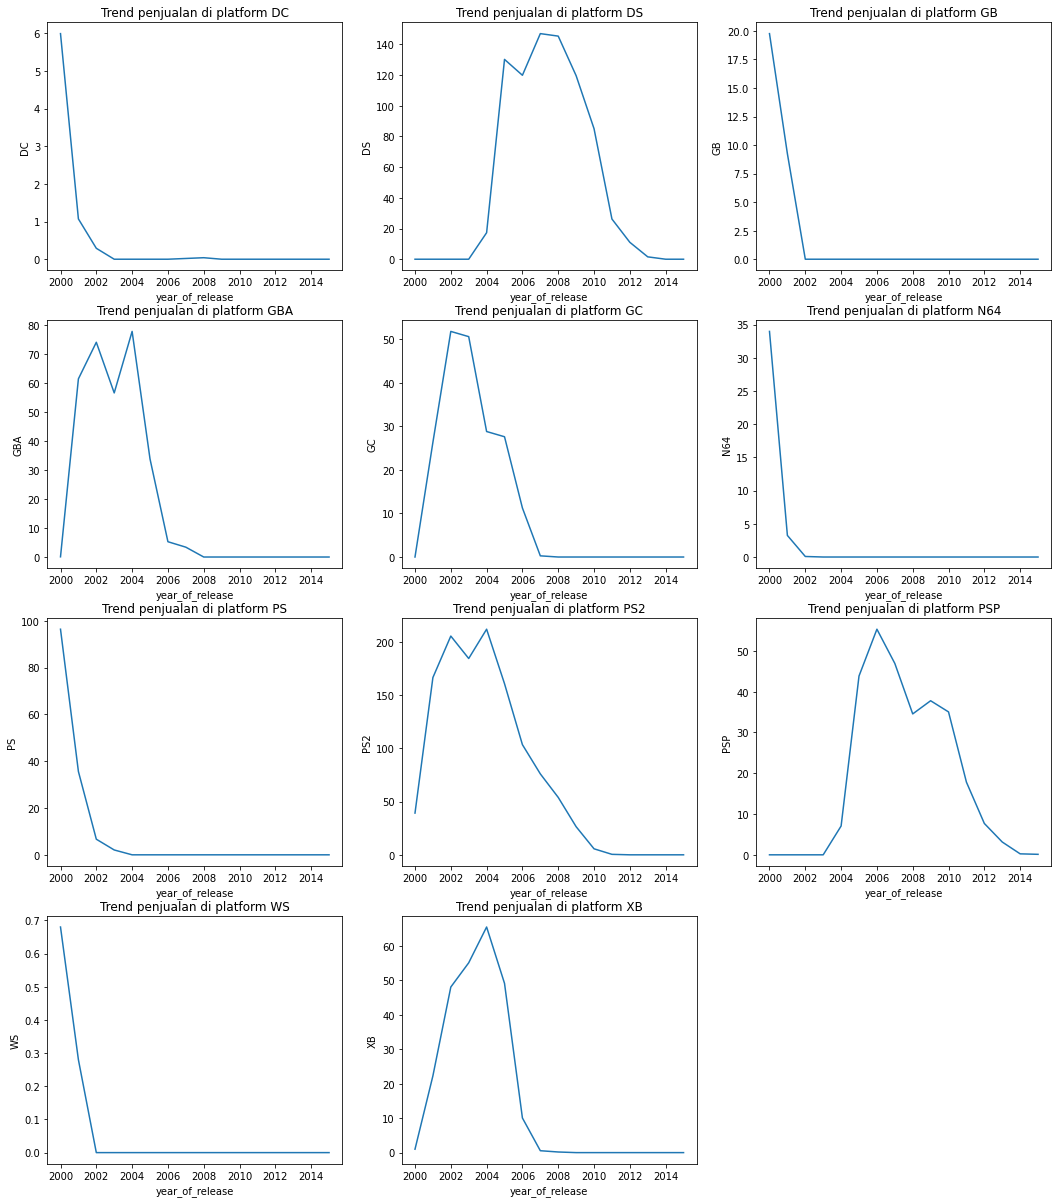

In [20]:
# menampilakan visualisasi pada platform yang sudah tidak populer

plt.figure(figsize=(18, 21))
i = 1
for platform in platforms_with_zero_sales_2016:
    total_years = pivot_unpopular_platform[platform].count()
    plt.subplot(4, 3, i)
    plt.title(f'Trend penjualan di platform {platform}')
    sns.lineplot(data=pivot_unpopular_platform, x="year_of_release", y=platform)
    i = i + 1
plt.show()

**Kesimpulan Sementara**


banyak platform yang sudah tidak poluper lagi dimana hampir tidak ada penjualan lagi di tahun 2016, seperti platform-platform berikut :'DC', 'DS', 'GB', 'GBA', 'GC', 'N64', 'PS', 'PS2', 'PSP', 'WS', 'XB'.

**Menghitung rata-rata berapa tahun platform lama mulai memudar**

In [21]:
# menghitung perisilan games platrorm dari tahun 2000 sampai sekarang

df1=df.groupby(['platform'])['year_of_release'].agg(['min','max']).reset_index()
df1

,platform,min,max
0,3DS,2011,2016
1,DC,2000,2008
2,DS,2004,2013
3,GB,2000,2001
4,GBA,2000,2007
5,GC,2001,2007
6,N64,2000,2002
7,PC,2000,2016
8,PS,2000,2003
9,PS2,2000,2011


In [22]:
# mengihtung rata-rata platform akan memudar

df1['age']=df1.apply(lambda row:row['max']-row['min'],axis=1)
print('Rata-rata umur platform:', df1['age'].median())

Rata-rata umur platform: 6.5


**Kesimpulan Sementara**

terhitung sejak tahun 2000 rata-rata platform akan memudar sekitar 6,5 tahun, maka masuk akal untuk mempertimbangkan jangka waktu tidak lebih dari periode ini untuk perkiraan penjualan tahun 2017.

##  Periode Waktu Pengambilan Data dan Mengerjakan Data yang Relevan

Berdasarkan analisi sebelumnya, dimana rata-rata waktu platform memudar adalah sekitar 6.5 tahun, maka untuk analisis selanjutnya kita hanya akan mengambil data 5 tahun terakhir, yaitu dari 2012 s/d 2016 guna membangun acuan bagi tahun 2017. Kita menganggap dalam 5 tahun terakhir trend nya tidak terpaut terlalu jauh.

In [23]:
# membuat dataframe baru dengan data dari 2012/2016

df_new = df[df['year_of_release'] >= 2012].reset_index(drop=True)

In [24]:
# memeriksa len data

df.shape, df_new.shape

((14470, 12), (2886, 12))

## Platform mana saja yang memiliki penjualan terbanyak? Platform mana saja yang tumbuh atau menyusut?

**Platform mana saja yang memiliki penjualan terbanyak?**

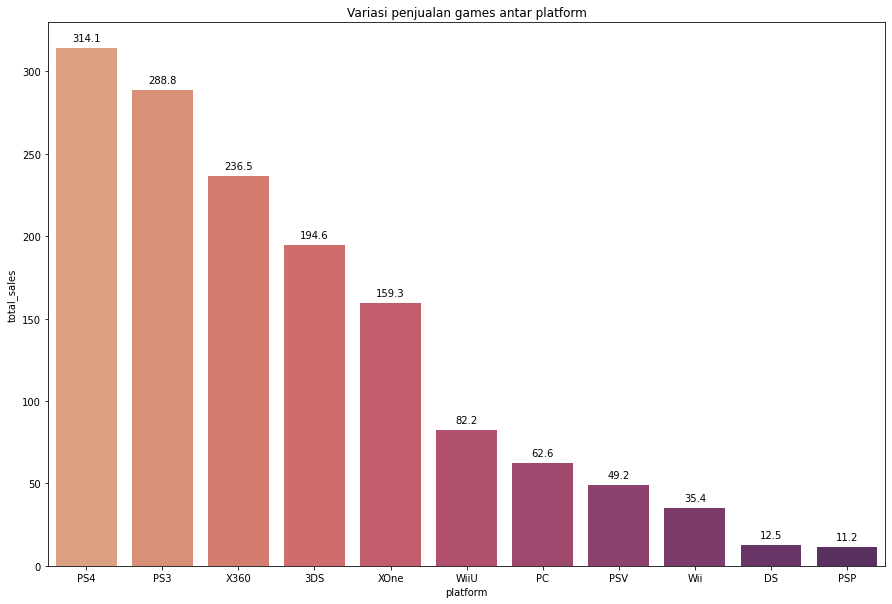

In [25]:
# melakukan pengelompokan penjumlahan platfrom dan total_sales
total_sales_platform_new = df_new.groupby('platform')['total_sales'].agg('sum').reset_index().sort_values('total_sales', ascending=False)

# membuat diagram batang
plt.figure(figsize=(15, 10))
a = sns.barplot(data=total_sales_platform_new, x='platform', y='total_sales', palette='flare')

# menampilkan label pada diagram batang
for g in a.patches:
    a.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), rotation=0, 
                   textcoords = 'offset points')

plt.title('Variasi penjualan games antar platform');

**Kesimpulan sementara**

berdasarkan data lima tahun terakhir, PS4 memiliki penjualan games terbanyak dengan total 314 juta USD

**Platform mana saja yang tumbuh atau menyusut?**

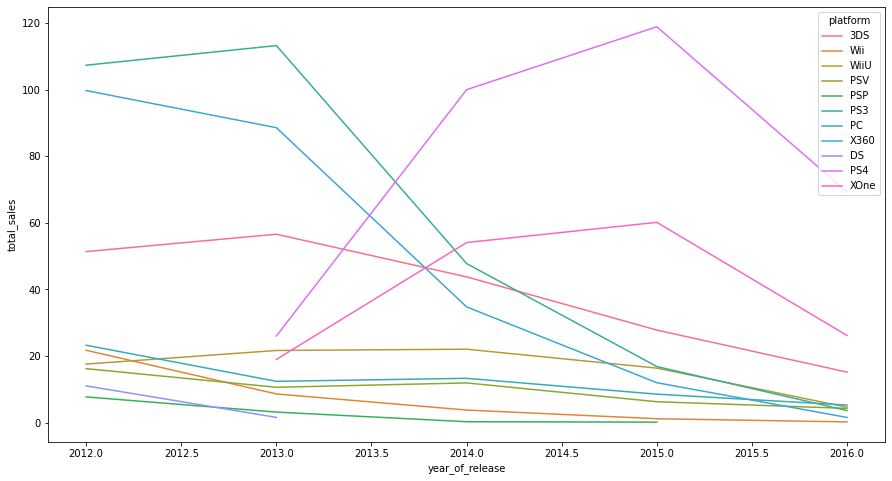

In [26]:
# mengelompokan data platform dan year_of_release

df_platform=df_new.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index().sort_values(by='year_of_release')

# membuat visualisasi platform yang tumbuh dan platform yang menyusut

plt.figure(figsize=(15,8))
ax = sns.lineplot(data=df_platform, x="year_of_release", y="total_sales",hue="platform")

**Kesimpulan sementara**

PS4 menjadi platform yang terus tumbuh sejak peluncurannya di tahun 2013 yangmana membuat PS3 mengalami penyusutan penjualan serta platform lain mengalami penyusutan penjualan sejak 5 tahun terakhir. kemungkinan besar dalam lima tahun kemudian PS4 akan terus mengalami peningkatan sebelum nantinya akan digantikan oleh PS5 yang akan datang

## Membuat Boxplot untuk Penjualan Global Semua Game yang Dikelompokan Berdasarkan Platform

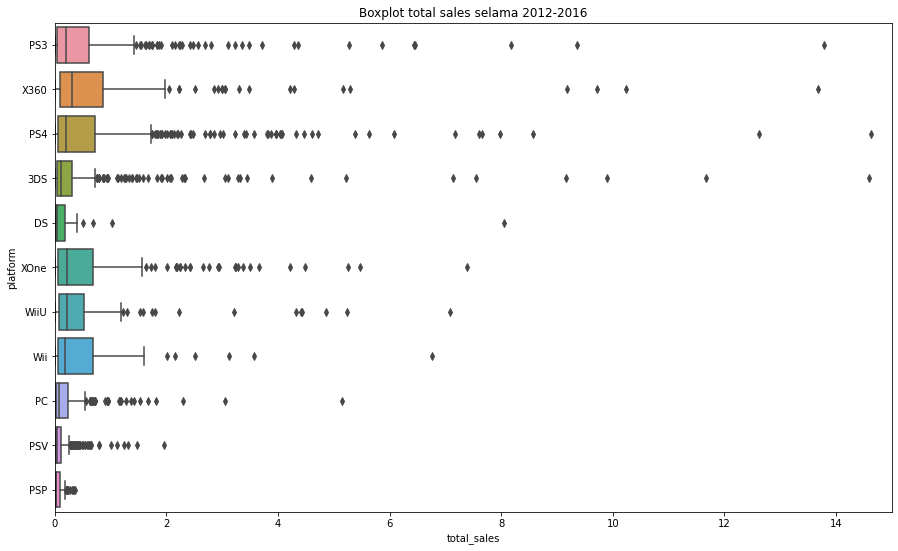

In [27]:
# membuat bloxplot df_new

plt.figure(figsize=(15, 9))
sns.boxplot(data=df_new, x='total_sales', y='platform')
plt.title('Boxplot total sales selama 2012-2016')
plt.xlim(-0, 15)
plt.show()

In [28]:
# mengeluarkan outlier

Q1 = df_new['total_sales'].quantile(.25)
Q3 = df_new['total_sales'].quantile(.75)
IQR = Q3-Q1
df_new_non_outlier = df_new[~((df_new['total_sales'] < (Q1 - 1.5*IQR)) |
                               (df_new['total_sales'] > (Q1 + 1.5*IQR)))]

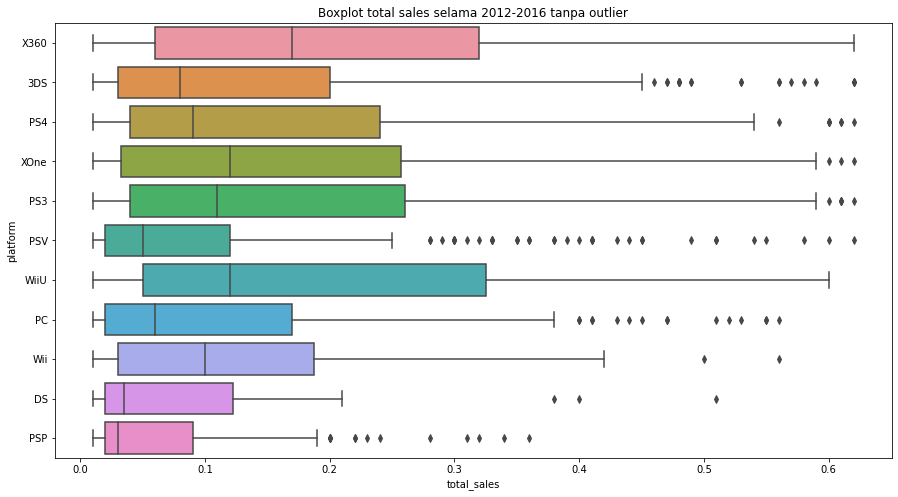

In [29]:
# membuat bloxplot df_new tanpa outlier

plt.figure(figsize=(15, 8))
sns.boxplot(data=df_new_non_outlier, x='total_sales', y='platform')
plt.title('Boxplot total sales selama 2012-2016 tanpa outlier')
plt.show()

In [30]:
# melihat rata-rata penjualan dari masing-masing platform

avg_sales = df_new_non_outlier.pivot_table(index='platform', values='total_sales').sort_values(
    by='total_sales', ascending=False).reset_index()
avg_sales

,platform,total_sales
0,X360,0.208543
1,WiiU,0.191565
2,XOne,0.173876
3,PS3,0.168360
4,PS4,0.154265
5,Wii,0.145000
6,3DS,0.138988
7,PC,0.117500
8,DS,0.099286
9,PSV,0.093800


**Kesimpulan Sementara**

Nilai-nilai ini menunjukkan rata-rata penjualan per game dalam setiap platform. Platform-platform seperti X360, WiiU, dan XOne memiliki nilai rata-rata penjualan yang lebih tinggi dibandingkan dengan platform-platform lainnya.

## Korelasi antara ulasan dan penjualan

Pada bagian ini, analis hanya akan melihat data dari PS4 karena platform ini merupakan platform dengan pendapatan terbesar saat ini, pertumbuhan tercepat, dan paling potensial untuk tahun mendatang. Data dengan nilai yang hilang pada `critic_score`, `user_score`, dan `rating` juga akan dikecualikan dari analisis ini.

In [31]:
# membuat dataframe PS4

df_ps4 = df[df['platform'] == 'PS4'].dropna().reset_index(drop=True)
df_ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
1,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
2,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
3,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
4,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
234,Super Stardust Ultra VR,PS4,2016,Shooter,0.00,0.01,0.00,0.00,66.0,6.2,E10+,0.01
235,Super Dungeon Bros,PS4,2016,Action,0.01,0.00,0.00,0.00,42.0,2.3,E10+,0.01
236,Sherlock Holmes: The Devil's Daughter,PS4,2016,Adventure,0.01,0.00,0.00,0.00,70.0,6.8,T,0.01
237,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01


Text(0, 0.5, 'Total sales (US$ juta)')

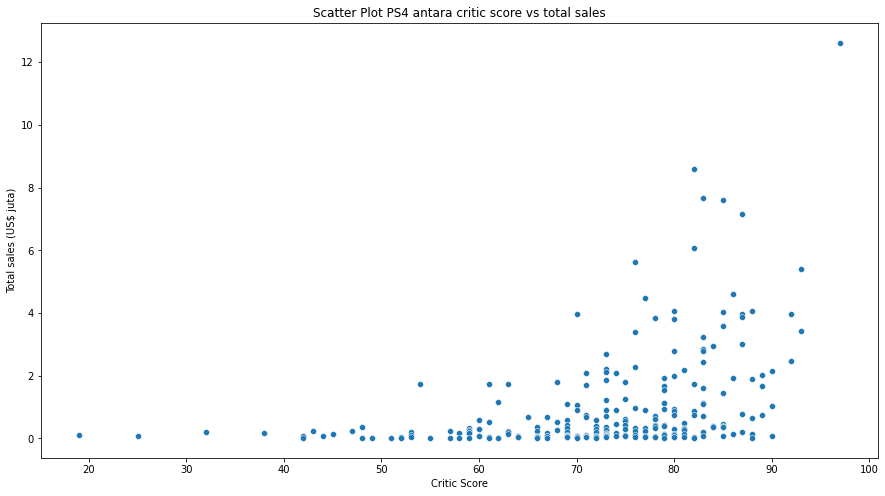

In [32]:
# scatter plot PS4 antara critic_score vs total_sales

plt.figure(figsize=(15, 8))
sns.scatterplot(data=df_ps4,x='critic_score',y='total_sales')
plt.title('Scatter Plot PS4 antara critic score vs total sales')
plt.xlabel('Critic Score')
plt.ylabel('Total sales (US$ juta)')

Text(0, 0.5, 'Total sales (US$ juta)')

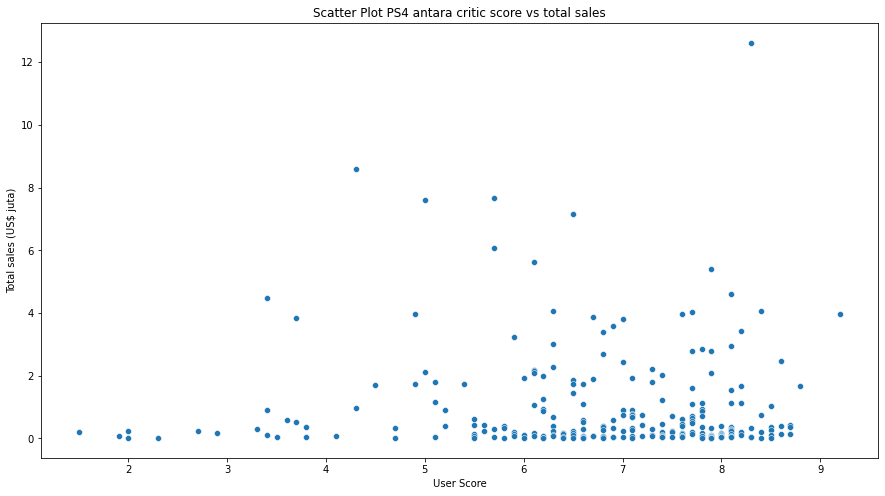

In [33]:
# scatter plot PS4 antara user_score vs total_sales

plt.figure(figsize=(15, 8))
sns.scatterplot(data=df_ps4,x='user_score',y='total_sales')
plt.title('Scatter Plot PS4 antara critic score vs total sales')
plt.xlabel('User Score')
plt.ylabel('Total sales (US$ juta)')

In [34]:
# menghitung korelasi

df_ps4.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.260023,-0.187866,-0.122026,-0.229202,-0.002748,0.148270,-0.231540
na_sales,-0.260023,1.000000,0.712361,0.528266,0.914296,0.411197,-0.019951,0.892574
eu_sales,-0.187866,0.712361,1.000000,0.518152,0.934677,0.344032,-0.048178,0.951346
jp_sales,-0.122026,0.528266,0.518152,1.000000,0.565064,0.321016,0.176156,0.590673
other_sales,-0.229202,0.914296,0.934677,0.565064,1.000000,0.406075,-0.034432,0.997777
critic_score,-0.002748,0.411197,0.344032,0.321016,0.406075,1.000000,0.572802,0.403573
user_score,0.148270,-0.019951,-0.048178,0.176156,-0.034432,0.572802,1.000000,-0.030888
total_sales,-0.231540,0.892574,0.951346,0.590673,0.997777,0.403573,-0.030888,1.000000


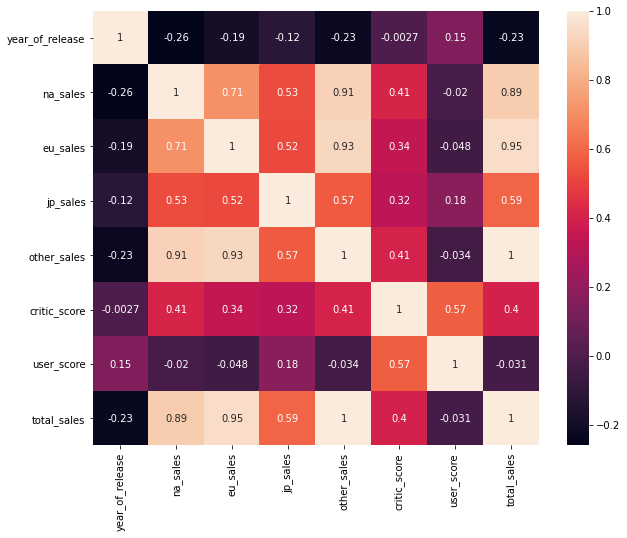

In [35]:
# melihat korelasi di platform PS4

plt.figure(figsize=(10, 8))
sns.heatmap(df_ps4.corr(), annot=True)
plt.show()

**Kesimpulan sementara**

bahwa critic_score memiliki korelasi positif terhadap total_sales, sementara user_score tidak menunjukkan korelasi yang signifikan dengan total_sales. yang artinya critic_score cukup menentukan peningkatan dari total_sales terhadap platform PS4

## Membandingkan penjualan game yang sama di platform lain.

membandingkan penjualan game yang sama di platform lainnya

In [36]:
# mencari game dengan frekuensi yang sering muncul

df_new['name'].value_counts()

LEGO Marvel Super Heroes                         9
FIFA 14                                          9
LEGO The Hobbit                                  8
The LEGO Movie Videogame                         8
Angry Birds Star Wars                            8
                                                ..
Senran Kagura Burst: Guren no Sh?jo-tachi        1
Ansatsu Kyoushitsu: Assassin Ikusei Keikaku!!    1
Stellaris                                        1
Darius Burst: Chronicle Saviours                 1
Donkey Kong Country: Tropical Freeze             1
Name: name, Length: 1671, dtype: int64

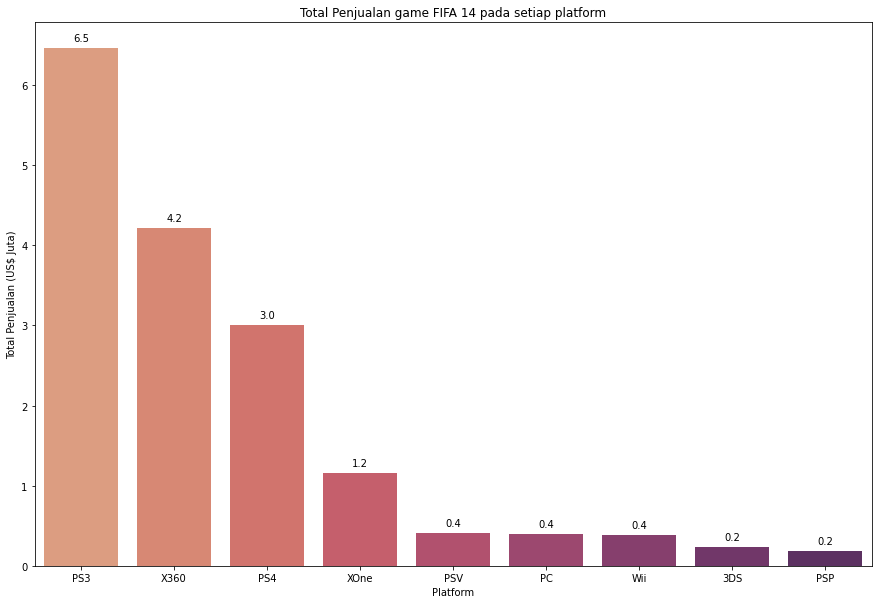

In [37]:
# membuat diagram batang penjualan game FIFA 14 pada setiap platform

plt.figure(figsize=(15,10))
fifa14 = sns.barplot(data=df_new[df_new['name'] == 'FIFA 14'], x='platform', y='total_sales', ci=None,palette='flare')

# membuat label diagram batang
for g in fifa14.patches:
    fifa14.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), rotation=0, 
                   textcoords = 'offset points')
    
plt.title('Total Penjualan game FIFA 14 pada setiap platform');
plt.xlabel('Platform')
plt.ylabel('Total Penjualan (US$ Juta)')
plt.show()

**Kesimpulan Sementara**

Game FIFA 14 dirilis pada September 2013 untuk PlayStation 2, PlayStation 3, PlayStation Portable, PlayStation Vita, Xbox 360, Wii, Nintendo 3DS dan Microsoft Windows. tetapi penjualan game FIFA 14 ini lebih laris pada platform PS3 dibandingkan dengan platform lainnya

## Distribusi umum game berdasarkan genre

In [38]:
# mengelompokan genre game terhadap total penjaualn

genre_agg = df_new.groupby('genre')['total_sales'].agg('sum').sort_values(ascending=False).reset_index()
print(genre_agg)

           genre  total_sales
0         Action       441.12
1        Shooter       304.73
2   Role-Playing       192.80
3         Sports       181.07
4           Misc        85.04
5       Platform        61.00
6         Racing        53.50
7       Fighting        44.49
8     Simulation        35.12
9      Adventure        29.43
10      Strategy        13.34
11        Puzzle         4.89


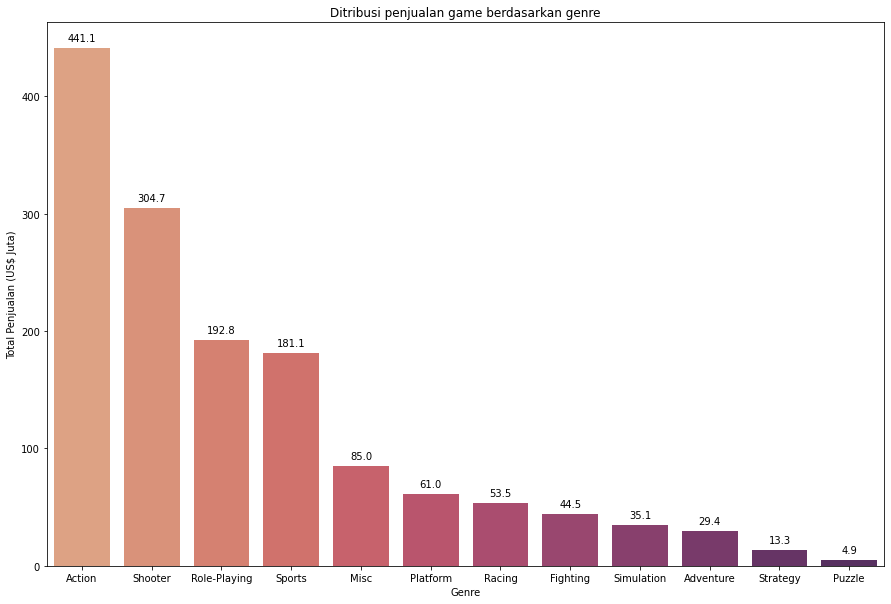

In [39]:
# membuat diagram total penjualan game berdasarkan genre

plt.figure(figsize=(15,10))
genre = sns.barplot(data=genre_agg, x='genre', y='total_sales', palette='flare')

# membuat label diagram batang
for g in genre.patches:
    genre.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), rotation=0, 
                   textcoords = 'offset points')
    
plt.title('Ditribusi penjualan game berdasarkan genre');
plt.xlabel('Genre')
plt.ylabel('Total Penjualan (US$ Juta)')
plt.show()

**Kesimpulan Sementara**

dari tahun 2012 - 2016 game dengan genre Action lebih banyak peminatnya jika dibandingkan dengan genre lainnya dan game dengan genre Puzzle memiliki peminat yang sedikit

## Kesimpulan Data Analyst

Dari analisis yang dilakukan, dapat disimpulkan bahwa industri permainan video mengalami puncak jumlah perilisan pada tahun 2008-2009, namun setelah itu terjadi penurunan. Platform PS2 memimpin dalam angka penjualan sepanjang tahun 2000-2016 dengan total penjualan sebesar 1.233 juta USD, menandakan dominasinya dalam industri. 

Analisis lima tahun terakhir (2012-2016) menunjukkan bahwa PS4 mendominasi penjualan games dengan total 314 juta USD, sementara platform lain seperti X360, WiiU, dan XOne juga menunjukkan penjualan yang tinggi. Korelasi positif antara critic_score dan total_sales pada platform PS4 menyarankan bahwa peningkatan critic_score berkorelasi dengan peningkatan penjualan, sementara user_score tidak memiliki dampak yang signifikan.

Game FIFA 14, yang dirilis pada 2013, lebih laris terjual di platform PS3 dibandingkan dengan platform lainnya. Selain itu, dalam rentang 2012-2016, genre Action menjadi favorit peminat, sementara genre Puzzle memiliki peminat yang lebih sedikit. 

Kesimpulan ini memberikan gambaran komprehensif tentang tren perilisan, penjualan, dan preferensi peminat dalam industri permainan video selama beberapa tahun terakhir.

# Pemrofilan pengguna untuk masing-masing wilayah

tahap ini analisa akan melakukan pemrofilan platform game untuk setiap wilayah, menganalisa game teratas dan apakah rating ESRB mempengaruhi penjualan dimasing-masing wilyah (NA, EU, JP).

## 5 Platform Teratas

In [40]:
# melihat penjualan platform pada setiap wilayah

platform_region = df_new.groupby('platform')[['na_sales','eu_sales','jp_sales']].agg('sum').reset_index()
print(platform_region)

   platform  na_sales  eu_sales  jp_sales
0       3DS     55.31     42.64     87.79
1        DS      4.59      3.53      3.72
2        PC     19.12     37.76      0.00
3       PS3    103.38    106.86     35.29
4       PS4    108.74    141.09     15.96
5       PSP      0.13      0.42     10.47
6       PSV     10.98     11.36     21.04
7       Wii     17.45     11.92      3.39
8      WiiU     38.10     25.13     13.01
9      X360    140.05     74.52      1.57
10     XOne     93.12     51.59      0.34


**Penjualan Platform pada Wilayah Amerika Utara**

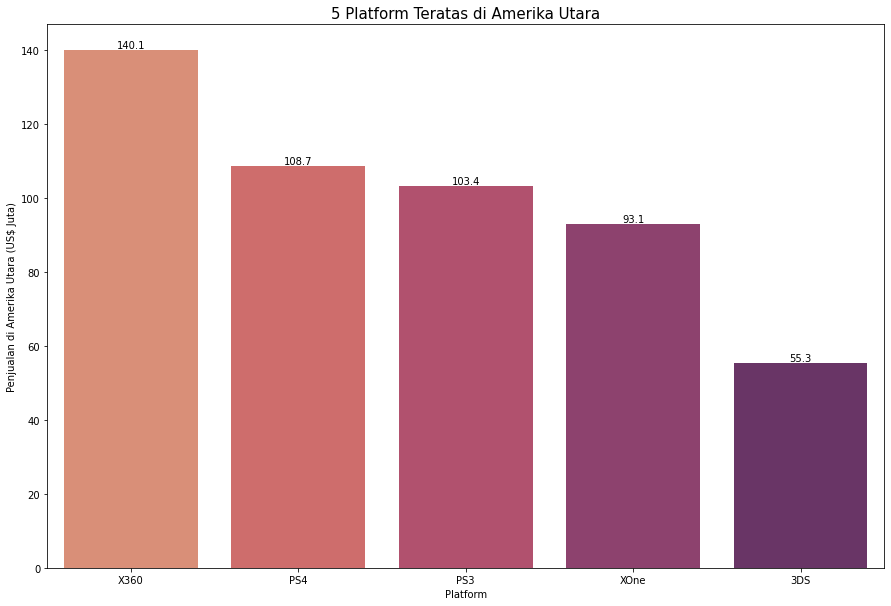

In [41]:
# melihat penjualan platform pada wilayah Amerika Utara

plt.figure(figsize=(15,10))
na = sns.barplot(data=platform_region.nlargest(5,'na_sales'), x='platform', y='na_sales', palette='flare')

# membuat label diagram batang
for g in na.patches:
    na.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), rotation=0, 
                   textcoords = 'offset points')
plt.title('5 Platform Teratas di Amerika Utara',fontsize=15)
plt.xlabel('Platform')
plt.ylabel('Penjualan di Amerika Utara (US$ Juta)')
plt.show()

**Penjualan Platform pada Wilayah Eropa**

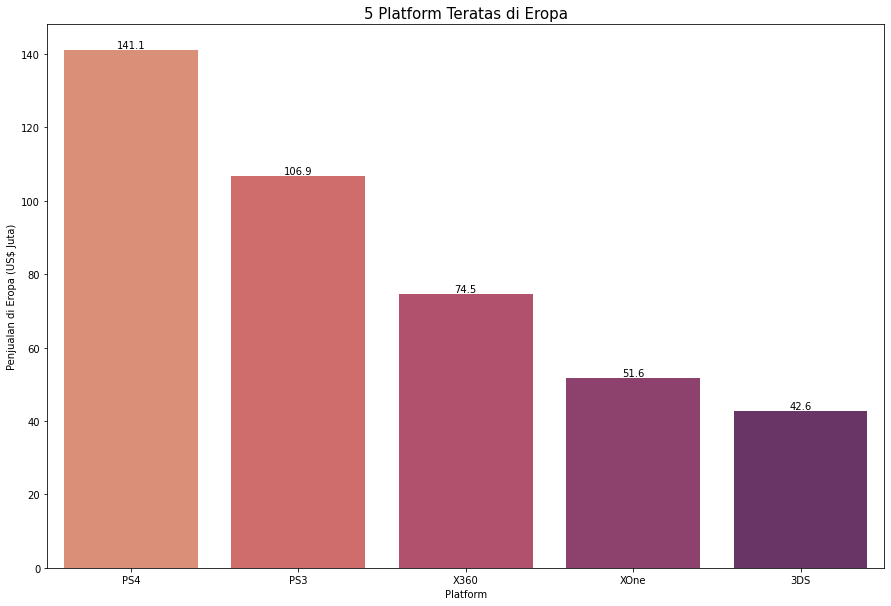

In [42]:
# melihat penjualan platform pada wilayah Eropa

plt.figure(figsize=(15,10))
eu = sns.barplot(data=platform_region.nlargest(5,'eu_sales'), x='platform', y='eu_sales', palette='flare')

# membuat label diagram batang
for g in eu.patches:
    eu.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), rotation=0, 
                   textcoords = 'offset points')
plt.title('5 Platform Teratas di Eropa',fontsize=15)
plt.xlabel('Platform')
plt.ylabel('Penjualan di Eropa (US$ Juta)')
plt.show()

**Penjualan Platform pada Wilayah Jepang**

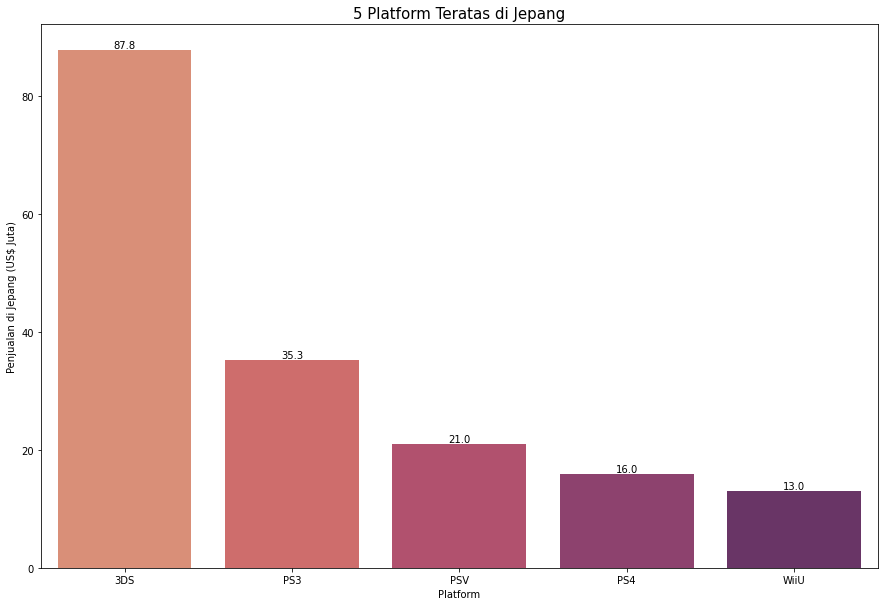

In [43]:
# melihat penjualan platform pada wilayah Jepang

plt.figure(figsize=(15,10))
jp = sns.barplot(data=platform_region.nlargest(5,'jp_sales'), x='platform', y='jp_sales', palette='flare')

# membuat label diagram batang
for g in jp.patches:
    jp.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), rotation=0, 
                   textcoords = 'offset points')
plt.title('5 Platform Teratas di Jepang',fontsize=15)
plt.xlabel('Platform')
plt.ylabel('Penjualan di Jepang (US$ Juta)')
plt.show()

**Kesimpulan Sementara**

- Di Amerika Tiga platform teratas (X360, PS2, Wii) berasal dari pengembang yang berbeda, penjualan di Amerika Utara menghasilkan pendapatan tertinggi dengan persaingan platform yang seimbang.
- Di Eropa, dominasi platform dari Sony dan Nintendo menandakan preferensi regional dengan pendapatan sekitar setengah dari Amerika Utara.
- Di Jepang, Nintendo dan Sony mendominasi. Preferensi yang tajam tercermin dalam pendapatan lebih rendah dan kesenjangan antar platform yang lebih besar. Konsol genggam mendominasi pasar Jepang.

## 5 Genre Teratas

In [44]:
# melihat Genre pada setiap wilayah

genre_region = df_new.groupby('genre')[['na_sales','eu_sales','jp_sales']].agg('sum').reset_index()
print(genre_region)

           genre  na_sales  eu_sales  jp_sales
0         Action    177.84    159.34     52.80
1      Adventure      8.92      9.46      8.24
2       Fighting     19.79     10.79      9.44
3           Misc     38.19     26.32     12.86
4       Platform     25.38     21.41      8.63
5         Puzzle      1.13      1.40      2.14
6         Racing     17.22     27.29      2.50
7   Role-Playing     64.00     48.53     65.44
8        Shooter    144.77    113.47      9.23
9     Simulation      7.97     14.55     10.41
10        Sports     81.53     69.09      8.01
11      Strategy      4.23      5.17      2.88


**Penjualan Genre pada Wilayah Amerika Utara**

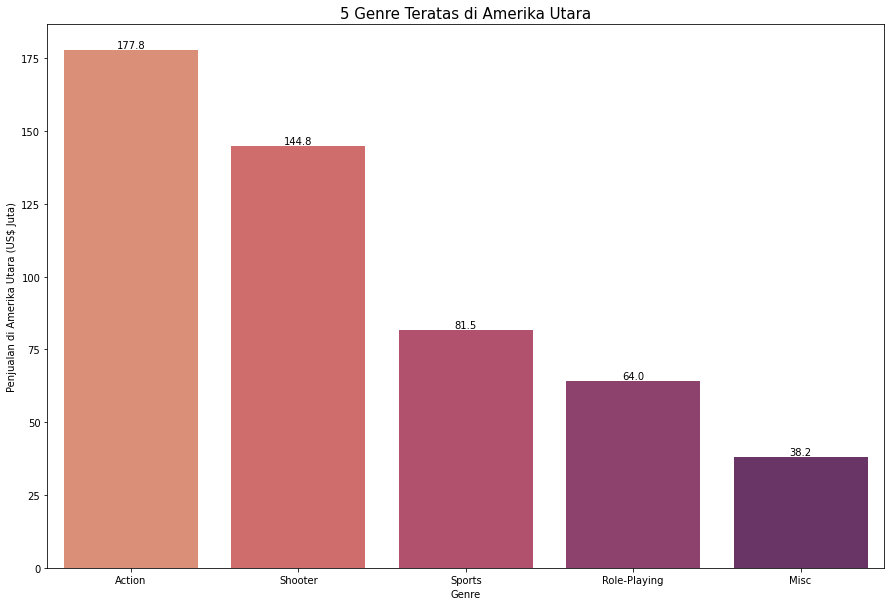

In [45]:
# melihat penjualan Genre games pada wilayah Amerika Utara

plt.figure(figsize=(15,10))
na = sns.barplot(data=genre_region.nlargest(5,'na_sales'), x='genre', y='na_sales', palette='flare')

# membuat label diagram batang
for g in na.patches:
    na.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), rotation=0, 
                   textcoords = 'offset points')
plt.title('5 Genre Teratas di Amerika Utara',fontsize=15)
plt.xlabel('Genre')
plt.ylabel('Penjualan di Amerika Utara (US$ Juta)')
plt.show()

**Penjualan Genre pada Wilayah Eropa**

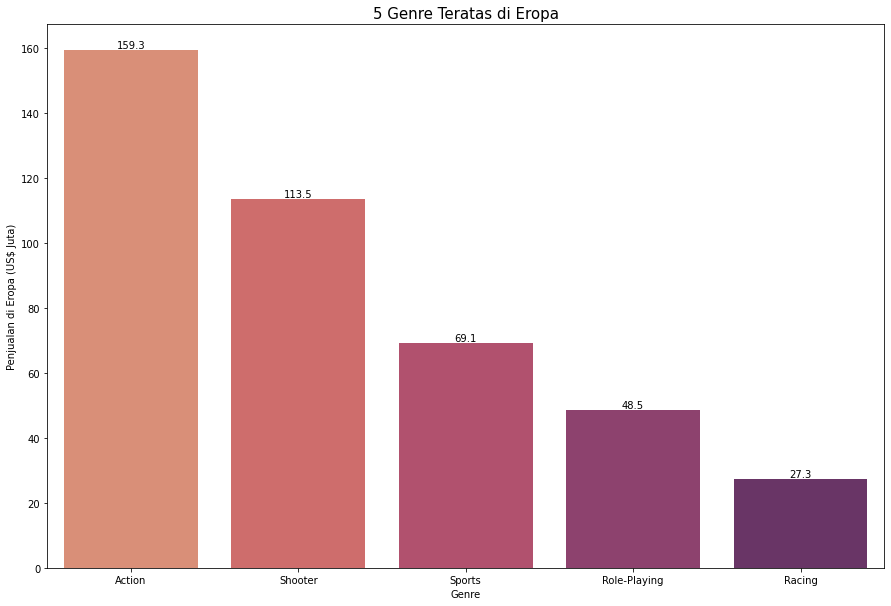

In [46]:
# melihat penjualan Genre games pada wilayah Eropa

plt.figure(figsize=(15,10))
eu = sns.barplot(data=genre_region.nlargest(5,'eu_sales'), x='genre', y='eu_sales', palette='flare')

# membuat label diagram batang
for g in eu.patches:
    eu.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), rotation=0, 
                   textcoords = 'offset points')
plt.title('5 Genre Teratas di Eropa',fontsize=15)
plt.xlabel('Genre')
plt.ylabel('Penjualan di Eropa (US$ Juta)')
plt.show()

**Penjualan Genre pada Wilayah Jepang**

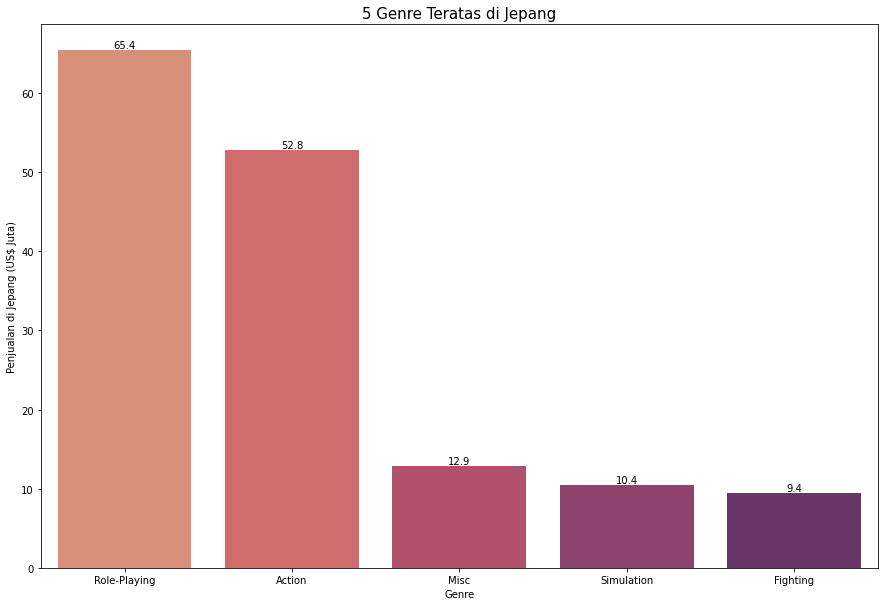

In [47]:
# melihat penjualan Genre games pada wilayah Jepang

plt.figure(figsize=(15,10))
jp = sns.barplot(data=genre_region.nlargest(5,'jp_sales'), x='genre', y='jp_sales', palette='flare')

# membuat label diagram batang
for g in jp.patches:
    jp.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), rotation=0, 
                   textcoords = 'offset points')
plt.title('5 Genre Teratas di Jepang',fontsize=15)
plt.xlabel('Genre')
plt.ylabel('Penjualan di Jepang (US$ Juta)')
plt.show()

**Kesimpulan Sementara**

Secara umum Game Action dan Role-playing masuk di 5 besar genre teratas disetiap wilayah. untuk Genre di wilayah Eropa dan Amerika Utara memiliki 4 genre teratas yang sama. sedangkan Genre wilayah jepang memiliki 3 genre teratas yang berbeda dengan kedua wilayah lainnya, Genre Role-Playing ternyata lebih diminati di wilayah jepang sedangkan untuk genre action lebih diminati di wilayah Amerika Utara dan Eropa

## Apakah rating ESRB memengaruhi penjualan di masing-masing wilayah?

In [48]:
# mengelompokan rating ESRB dan wilayah

esrb_rating = df_new.groupby('rating')[['na_sales','eu_sales','jp_sales']].agg('sum').reset_index()
esrb_rating = esrb_rating.rename(columns={'na_sales':'sales_na','eu_sales':'sales_eu','jp_sales':'sales_jp'})
esrb_rating = pd.wide_to_long(esrb_rating, stubnames="sales",i="rating",j="region",sep='_', suffix=r'\w+').reset_index()
print(esrb_rating)

   rating region   sales
0       E     na  114.37
1    E10+     na   75.70
2       M     na  231.57
3       T     na   66.02
4       E     eu  113.03
5    E10+     eu   55.37
6       M     eu  193.96
7       T     eu   52.96
8       E     jp   28.33
9    E10+     jp    8.19
10      M     jp   21.20
11      T     jp   26.02


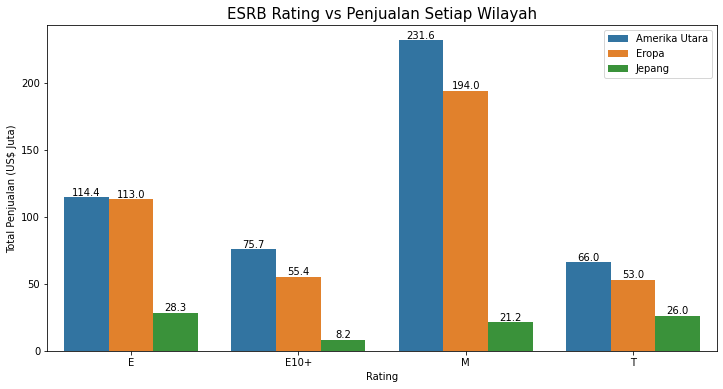

In [49]:
# melihat penjualan games berdasarkan rating pada setiap wilayah

plt.figure(figsize=(12,6))
esrb = sns.barplot(data=esrb_rating, x='rating', y='sales', hue='region')

# membuat label diagram batang
for g in esrb.patches:
    esrb.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), rotation=0, 
                   textcoords = 'offset points')
plt.title('ESRB Rating vs Penjualan Setiap Wilayah',fontsize=15)
plt.xlabel('Rating')
plt.ylabel('Total Penjualan (US$ Juta)')
esrb_legend = plt.legend()
esrb_legend.get_texts()[0].set_text('Amerika Utara')
esrb_legend.get_texts()[1].set_text('Eropa')
esrb_legend.get_texts()[2].set_text('Jepang')
plt.show()

**Kesimpulan Sementara**

secara keseluruhan penjualan rating M memiliki pendapatan lebih tinggi di wilayah Eropa dan Amerika Utara. sedangkan di Jepang Rating E dan T lebih populer dibandingkan rating M

## Kesimpulan Pemrofilan pengguna untuk masing-masing wilayah

Kesimpulan dari analisis pasar game di berbagai wilayah dapat diambil dari beberapa pola yang menonjol. Di Amerika Utara, persaingan platform yang seimbang antara tiga platform teratas (X360, PS2, Wii) dari pengembang yang berbeda menghasilkan pendapatan tertinggi. Di Eropa, dominasi platform dari Sony dan Nintendo mencerminkan preferensi regional, walaupun pendapatannya sekitar setengah dari Amerika Utara. Di Jepang, Nintendo dan Sony mendominasi pasar dengan preferensi yang tajam, tercermin dari pendapatan yang lebih rendah dan kesenjangan antar platform yang lebih besar, dengan konsol genggam mendominasi pasar.

Secara keseluruhan, genre game Action dan Role-playing menduduki peringkat teratas di setiap wilayah. Meskipun Eropa dan Amerika Utara memiliki empat genre teratas yang sama, Jepang memiliki tiga genre teratas yang berbeda, menunjukkan perbedaan preferensi. Role-Playing lebih diminati di Jepang, sementara Action lebih diminati di Amerika Utara dan Eropa.

Ketika melihat rating game, penjualan dengan rating M memiliki pendapatan lebih tinggi di Eropa dan Amerika Utara secara keseluruhan. Di Jepang, rating E dan T lebih populer dibandingkan dengan rating M

# Melakukan Uji Hipotesis

Dalam analisa ini ada 2 hipotesis yang akan diuji:

- Rata-rata rating pengguna platform Xbox One dan PC adalah sama. 
- Rata-rata rating pengguna genre Action dan Sports berbeda.
- Menggunakan pendekatan hipotesis dua sample Independent (Independent T-Test) karena menggunakan dua sample yang berbeda


## Rata-rata rating pengguna platform Xbox One dan PC adalah sama.

- Nilai "alpha" yang akan digunakan = 0.05, karena merupakan salah satu pengukuran umum signifikansi statistik.
- H0 = Rata-rata rating pengguna platform Xbox One dan PC sama
- H1 = Rata-rata rating pengguna platform Xbox One dan PC tidak sama

In [50]:
# menghitung varioans dari Xbox One dan PC

rating_user_xone = df_new[df_new['platform'] == 'XOne']['user_score']
rating_user_pc = df_new[df_new['platform'] == 'PC']['user_score']

print('Varians rating pengguna XOne:', np.var(rating_user_xone).round(2))
print('Varians rating pengguna PC:', np.var(rating_user_pc).round(2))

Varians rating pengguna XOne: 1.9
Varians rating pengguna PC: 2.76


Variasi antara pengguna PC dan pengguna XBox One berbeda, oleh karena maka untuk perhitungan uji hipotesis, equal_var diisi dengan = False.

In [51]:
# menguji hipotesis - Rata-rata rating pengguna platform Xbox One dan PC adalah sama

alpha = 0.05
results_1 = st.ttest_ind(rating_user_xone, rating_user_pc, equal_var=False, nan_policy='omit')

# print p-value
print('p-value:', results_1.pvalue)

# membandingkan nilai p dengan tingkat signifikansi
if results_1.pvalue < alpha:
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value: 0.5489537965134987
Kita tidak dapat menolak hipotesis nol


Hasil uji hipotesis pertama adalah kita tidak dapat menolak hipotesis nol, yang berarti rata-rata rating pengguna platform Xbox One dan PC adalah sama.

## Rata-rata rating pengguna genre Action dan Sports berbeda.

- Nilai "alpha" yang akan digunakan = 0.05, karena merupakan salah satu pengukuran umum signifikansi statistik.
- H0 = Rata-rata rating pengguna genre Action dan Sports sama
- H1 = Rata-rata rating pengguna genre Action dan Sports tidak sama

In [52]:
# menghitung varioans dari Genre Action dan Sports

rating_user_action = df_new[df_new['genre'] == 'Action']['user_score']
rating_user_sports = df_new[df_new['genre'] == 'Sports']['user_score']

print('Varians rating Genre Action:', np.var(rating_user_action).round(2))
print('Varians rating Genre Sports:', np.var(rating_user_sports).round(2))

Varians rating Genre Action: 1.89
Varians rating Genre Sports: 3.01


Variasi antara genre Action dan Sports berbeda, oleh karena maka untuk perhitungan uji hipotesis, equal_var diisi dengan = False.

In [53]:
# menguji hipotesis - Rata-rata rating Genre Action dan Sports adalah berbeda

alpha = 0.05
results_2 = st.ttest_ind(rating_user_action, rating_user_sports, equal_var=False, nan_policy='omit')

# print p-value
print('p-value:',results_2.pvalue) 

# membandingkan nilai p dengan tingkat signifikansi
if results_2.pvalue < alpha:
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value: 4.24307776572644e-20
Kita menolak hipotesis nol


Hasil uji hipotesis kedua juga adalah kita tidak dapat menolak hipotesis nol, yang berarti rata-rata rating pengguna rating pengguna genre Action dan Sports adalah tidak sama.

## Kesimpulan Uji Hipotesis

**Kesimpulan Hipotesis Pertama:**
Kita tidak dapat menolak hipotesis nol. Ini berarti tidak ada cukup bukti statistik yang mendukung perbedaan yang signifikan antara varians rating pengguna platform Xbox One dan PC. Dengan kata lain, rata-rata rating pengguna keduanya mungkin sama.


**Kesimpulan Hipotesis Kedua:**
Kita menolak hipotesis nol. Terdapat cukup bukti statistik yang mendukung perbedaan yang signifikan antara varians rating pengguna genre Action dan Sports. Dengan kata lain, rata-rata rating pengguna antara genre Action dan Sports adalah berbeda.

# Kesimpulan Umum

Berdasarkan hasil analisis yang telah dilakukan terhadap industri permainan video dengan fokus pada toko online "Ice" dan data tahun 2016, kami berhasil mengidentifikasi pola-pola yang dapat memberikan wawasan strategis untuk perencanaan kampanye iklan pada tahun 2017.

Dari segi perilisan game, industri mengalami puncak pada tahun 2008-2009, namun setelah itu terjadi penurunan. Platform PS2 menonjol sebagai pemimpin dengan total penjualan sebesar 1.233 juta USD, menunjukkan dominasinya dalam industri selama rentang waktu 2000-2016.

Ketika mengevaluasi lima tahun terakhir (2012-2016), PS4 muncul sebagai pemimpin penjualan games dengan total 314 juta USD. Korelasi positif antara critic_score dan total_sales pada platform PS4 menunjukkan bahwa peningkatan critic_score berkorelasi dengan peningkatan penjualan, sedangkan user_score tidak memiliki dampak yang signifikan.

Selama periode 2012-2016, genre Action menjadi favorit peminat, sementara genre Puzzle memiliki peminat yang lebih sedikit.

Melihat pasar game di berbagai wilayah, Amerika Utara menunjukkan persaingan platform yang seimbang, sementara di Eropa terlihat dominasi platform dari Sony dan Nintendo. Di Jepang, Nintendo dan Sony mendominasi dengan preferensi yang tajam, tercermin dalam pendapatan lebih rendah dan kesenjangan antar platform yang lebih besar, dengan konsol genggam mendominasi pasar.

Dalam hal genre game, Action dan Role-playing menduduki peringkat teratas di setiap wilayah, meskipun terdapat perbedaan preferensi di Jepang. Role-Playing lebih diminati di Jepang, sementara Action lebih diminati di Amerika Utara dan Eropa.

Terakhir, ketika melihat rating game, penjualan dengan rating M memiliki pendapatan lebih tinggi di Eropa dan Amerika Utara secara keseluruhan. Di Jepang, rating E dan T lebih populer dibandingkan dengan rating M.

Berdasarkan hasil uji hipotesis, dapat disimpulkan bahwa hipotesis pertama, yang menguji perbedaan varians rating pengguna antara platform Xbox One dan PC, tidak dapat ditolak. Artinya, tidak ada cukup bukti statistik yang mendukung perbedaan yang signifikan antara varians rating pengguna kedua platform tersebut. Secara sederhana, kita dapat menyimpulkan bahwa rata-rata rating pengguna pada platform Xbox One dan PC mungkin sama.

Sementara itu, hipotesis kedua menunjukkan hasil yang berbeda. Dengan menolak hipotesis nol, terdapat cukup bukti statistik yang mendukung perbedaan yang signifikan antara varians rating pengguna genre Action dan Sports. Jadi, dapat diartikan bahwa rata-rata rating pengguna antara genre Action dan Sports memang berbeda. Hasil ini memberikan wawasan yang berharga tentang preferensi pengguna antara kedua genre tersebut.

**Rekomendasi strategi penjualan yang dapat meningkatkan performa toko:**

1. Fokus pada Platform Unggulan:
    - Mengingat dominasi PS4 dalam lima tahun terakhir, disarankan untuk meningkatkan stok dan promosi game-game yang dirilis di platform ini. Dimana rata-rata waktu platform memudar adalah sekitar 6.5 tahun sebelum adanya platform baru
    
    
2. Optimalkan Kualitas Game:
    - Game yang memiliki ulasan kritikus yang baik memiliki kinerja yang lebih baik di pasar, sementara ulasan pengguna tidak berdampak pada penjualan. Performa penjualan game yang sama berbeda di setiap platform. Investasikan pada pengembangan game berkualitas tinggi dan fokus pada penerimaan kritis untuk meningkatkan daya tarik pelanggan.
    
    
3. Pemanfaatan Genre Populer:
    - Berdasarkan analisis genre, perhatikan pemasaran dan promosi khusus untuk game-game dengan genre Action, Shooter, Sports dan Role-playing. Ini dapat mencakup paket bundel atau diskon untuk game-game populer dalam kategori ini.
    
    
4. Pengoptimalan Rating Usia:
    - Manfaatkan popularitas rating M di Eropa dan Amerika Utara dengan menonjolkan game-game dengan rating tersebut. Di Jepang, pertimbangkan strategi khusus untuk menarik pemain dengan rating E dan T.